# Understanding *The Office*: An Analysis of the Complete Transcripts
## Project Notebook
### Sam Bacon

# Progress Reports

Progress Report #1:

I have successfully converted the data from R and loaded it into a Python dataframe called 'officeData.' I also have begun the process of tokenizing all of the lines and sorting them by speaker. My next step is to finish tokenizing and to create the majority of my visualizations. One slight difficulty that I am having is figuring out how to combine all of the tokenized words into a single list that I can use to create the visualizations. However, I am confident that I will be able to resolve this quickly.

Progress Report #2:

First, I found a way to combine all of the tokenized words into single lists for each character. From there, I was able to create a variety of visualizations related to word frequency and Part-of-Speech tagging. I also made some solid progress on my visualizations related to the 'imdb_rating' attribute. I plan to make one or two more and then begin to train and create the various models that I discussed in my proposal.

Progress Report #3:

I have completed my visualizations for the 'imdb_attribute' and have started to create the models. Based on what I have seen so far, I plan to create a few cluster models (text_length vs imdb_score, polarity vs. subjectivity, and maybe a few others). My plan is to combine these scores so that I end up with the mean value for each episode. Honestly, it is not looking like there will be a ton of great results, but I am hoping to find some interesting patterns to discuss.

# Introduction and Problem Statement

Movies, TV shows, and a variety of streaming services command a massive share in the global entertainment industry. If a new show is released and its popularity explodes, there is no limit on how successful and profitable that series can be. However, producers and film crews
are operating in a highly competitive market, with dozens of new movies and shows released
every week. Bearing the cutthroat nature of this industry in mind, it is crucial that creators understand what makes a show or movie successful. How long are the episodes/seasons? What are the character dynamics? How long are the scenes? The better producers understand the intricacies of a successful movie or series, the better off they will be as they look to create
the next blockbuster.

*The Office* (US Version) is a wildly popular TV show that ran from 2005 until 2013. The writers and cast members collected countless awards, and it seems that everyone you ask has seen at least a few episodes (or every episode a few times). If a producer hopes to create a show that will captivate audiences for years to come, The Office serves as a golden example. This analysis will seek to gain a better understanding of how *The Office* is structured by investigating the following topics and questions:

1. Length and content of transcripts: How long are these episodes (here, length refers to transcript length)? Which characters speak the most throughout the show, and what parts of speech are most common?

2. Sentiment: What is the overall sentiment of *The Office*? How do key sentiment metrics (polarity and subjectivity) vary between episodes and does this have an effect on episode ratings?

3. Factors impacting IMDB ratings: What attributes that are available in this data set have the greatest impact on overall ratings? 

Main question:
If a producer was looking to create a new television series, what are the key takeaways from this investigation that they should keep in mind as they design their show?




# Libraries

In [1]:
# installing packages (all required packages will be listed here)
import numpy as np
import pandas as pd
import seaborn as sns;
import matplotlib.pyplot as plt

#!pip install nltk
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from collections import Counter
from textblob import TextBlob
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


# Accessing the Data

The data was originally in an R-package called 'schrute.' To access the data, I used the write.csv() function in R to store the data as a .csv file. Then, I uploaded it to this notebook.

In [2]:
# reading data into notebook
officeData = pd.read_csv('officeData.csv')
officeData = officeData.drop(['Unnamed: 0'], axis=1)
officeData.head(5)

,index,season,episode,episode_name,director,writer,character,text,text_w_direction,imdb_rating,total_votes,air_date
0,1,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,All right Jim. Your quarterlies look very good...,All right Jim. Your quarterlies look very good...,7.6,3706,2005-03-24
1,2,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Oh, I told you. I couldn't close it. So...","Oh, I told you. I couldn't close it. So...",7.6,3706,2005-03-24
2,3,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,So you've come to the master for guidance? Is ...,So you've come to the master for guidance? Is ...,7.6,3706,2005-03-24
3,4,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Actually, you called me in here, but yeah.","Actually, you called me in here, but yeah.",7.6,3706,2005-03-24
4,5,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,"All right. Well, let me show you how it's done.","All right. Well, let me show you how it's done.",7.6,3706,2005-03-24


# Methods Outline

Again, this investigation is guided by the topics described above. The organization of the analysis coincides with those themes, and the following outline describes the data mining techniques that were used.

1. Transcript analysis (length and content)
*   Identifying the most "important" characters (those who spoke the most)
*   Tokenization of transcripts from top five characters (using NLTK)
*   Word Frequency distributions using tokenized lists
*   Heatmap (seaborn) of TF-IDF scores TfidfTransformer (sklearn) 
*   Bar charts of counts based on Part-of-Speech tagging (NLTK) 
2. Sentiment Analysis
*   Scatterplots of polarity scores using TextBlob (by episode) 
*   Scatterplots of subjectivity scores using TextBlob (by episode)
*   Scatterplots and correlation coefficient examining relationship between polarity and subjectivity
3. IMDB Rating Analysis
*   Bar graph of top directors in terms of IMDB rating
*   Scatterplots and correlation coefficients for the following attributes...

  (a) transcript length vs. IMDB rating

  (b) episode polarity vs. IMDB rating

  (c) episode subjectivity vs. IMDB rating



*   K-means clustering model for transcript length vs. IMDB rating
*   K-means clustering model for episode polarity vs. subjectivity
*   Regression model for transcript length vs IMDB rating
*   Regression model for episode polarity vs. subjectivity





















# Transcript Analysis

In [3]:
# Note...
len(pd.unique(officeData['character']))

773

There are 773 unique characters who had at least one line throughout *The Office*. Obviously it does not make sense to analyze the transcripts of each character. Therefore, I have decided to focus on the five characters who spoke the most throughout the show (see below).

**Identifying the Top 5 Characters**

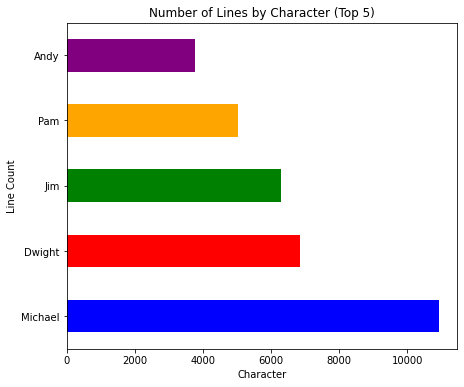

Lines by Character


Michael    10921
Dwight      6847
Jim         6303
Pam         5031
Andy        3754
Name: character, dtype: int64

In [4]:
officeData['character'].value_counts().nlargest(5).plot(kind='barh', figsize=(7, 6), color=['blue', 'red', 'green', 'orange', 'purple'])
plt.xlabel('Character')
plt.ylabel('Line Count')
plt.title('Number of Lines by Character (Top 5)')
plt.show()

print("Lines by Character")
officeData['character'].value_counts().nlargest(5)


*Observations:*

The top five characters in terms of total lines are Michael, Dwight, Jim, Pam, and Andy. I will be creating visualizations for these characters. One observation that stands out is that Michael has significantly more lines than any other character. He has over 4,000 more than Dwight, the character with the second-most lines. The remaining four characters are all within about 3,000 lines of each other.

**Tokenization**

In [5]:
# Based on character

# Michael
michael = officeData.loc[officeData['character'] == 'Michael']
michael_tokenized = michael['text'].astype(str).apply(word_tokenize)
michael_tokenized_final = [i for j in michael_tokenized for i in j]

# Jim
jim = officeData.loc[officeData['character'] == 'Jim']
jim_tokenized = jim['text'].astype(str).apply(word_tokenize)
jim_tokenized_final = [i for j in jim_tokenized for i in j]

# Dwight
dwight = officeData.loc[officeData['character'] == 'Dwight']
dwight_tokenized = dwight['text'].astype(str).apply(word_tokenize)
dwight_tokenized_final = [i for j in dwight_tokenized for i in j]

# Pam
pam = officeData.loc[officeData['character'] == 'Pam']
pam_tokenized = pam['text'].astype(str).apply(word_tokenize)
pam_tokenized_final = [i for j in pam_tokenized for i in j]

# Andy
andy = officeData.loc[officeData['character'] == 'Andy']
andy_tokenized = andy['text'].astype(str).apply(word_tokenize)
andy_tokenized_final = [i for j in andy_tokenized for i in j]

**Removing Stop Words**

In [6]:
stop_words = nltk.corpus.stopwords.words('english')
other_words = [",",".","?","'s","!","...","n't","'re","ok","okay","um","na","oh","'m","uh"]
stop_words.extend(other_words)

filtered_michael=[]
for w in michael_tokenized_final:
    if w.lower() not in stop_words:
        filtered_michael.append(w.lower())

filtered_dwight=[]
for w in dwight_tokenized_final:
    if w.lower() not in stop_words:
        filtered_dwight.append(w.lower())

filtered_jim=[]
for w in jim_tokenized_final:
    if w.lower() not in stop_words:
        filtered_jim.append(w.lower())

filtered_pam=[]
for w in pam_tokenized_final:
    if w.lower() not in stop_words:
        filtered_pam.append(w.lower())

filtered_andy=[]
for w in andy_tokenized_final:
    if w.lower() not in stop_words:
        filtered_andy.append(w.lower())

**Word Frequencies by Character**

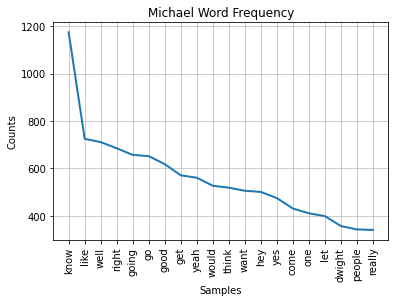

In [7]:
# Michael
fdist_michael = FreqDist(filtered_michael)
plt.title('Michael Word Frequency')
fdist_michael.plot(20,cumulative=False)

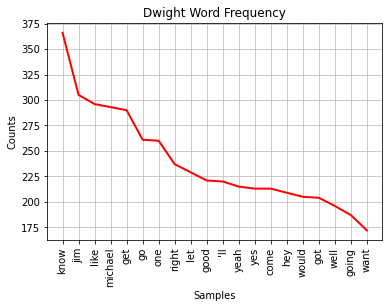

In [8]:
# Dwight
fdist_dwight = FreqDist(filtered_dwight)
plt.title('Dwight Word Frequency')
fdist_dwight.plot(20,cumulative=False, color = 'red')

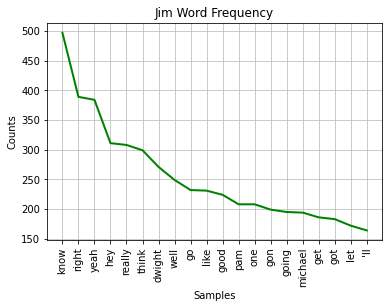

In [9]:
# Jim
fdist_jim = FreqDist(filtered_jim)
plt.title('Jim Word Frequency')
fdist_jim.plot(20,cumulative=False, color = 'green')

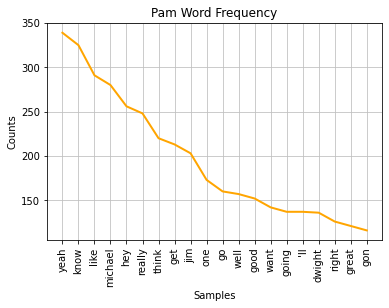

In [10]:
# Pam
fdist_pam = FreqDist(filtered_pam)
plt.title('Pam Word Frequency')
fdist_pam.plot(20,cumulative=False, color = 'orange')

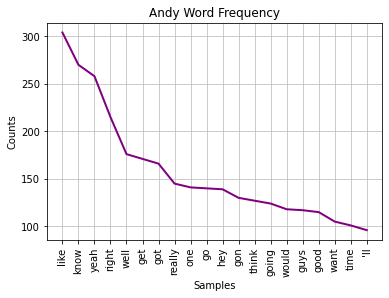

In [11]:
# Andy
fdist_andy = FreqDist(filtered_andy)
plt.title('Andy Word Frequency')
fdist_andy.plot(20,cumulative=False, color = 'purple')

*Word Frequency Observations:* 

As expected, many of the words appear on multiple or all of the frequency distributions. Words such as "like", "yeah", and "get" are among the top 20 for all five characters, but an argument could be made that they do not provide much insight into the transcripts. However, popular words such as "think", "want" and "come" may be more useful. Another noteworthy observation is that character names are common throughout these distributions. For example, "Michael", "Dwight" and "Pam" are all in Jim's top 20 words. The only character out of the five who does not have another character's name in their top 20 words is Andy.

**TF-IDF Scores**

In [12]:
# New data frame...
# column 1 = characters, column 2 = filtered words (by character)

d = {'character': ['michael','dwight','jim','pam','andy'], 'text': [filtered_michael,filtered_dwight,filtered_jim,filtered_pam,filtered_andy]}
df = pd.DataFrame(data=d)

count_vect = CountVectorizer(lowercase=True, stop_words=stop_words, max_features = 25)
tfidf_transformer = TfidfTransformer()

sparse_counts = count_vect.fit_transform(df['text'].astype(str))
counts = sparse_counts.todense()

sparse_tfidf = tfidf_transformer.fit_transform(counts)
tfidf = sparse_tfidf.todense()

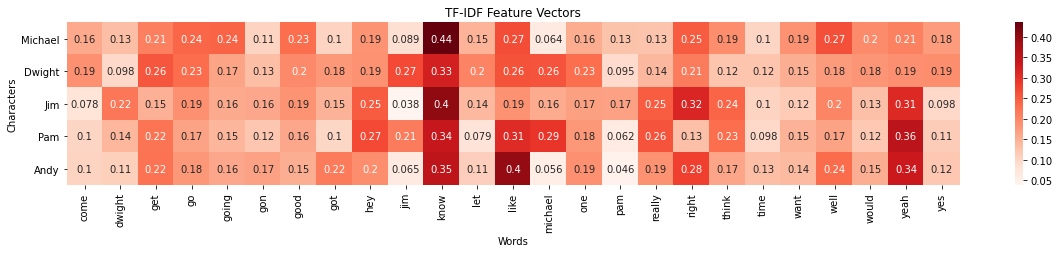

In [13]:
# Heatmap

plt.figure(figsize=(20, 3))
sns.heatmap(tfidf, square=False, annot=True, cbar=True, cmap="Reds",
            xticklabels=count_vect.get_feature_names(), yticklabels = ['Michael','Dwight','Jim','Pam','Andy'])

plt.xticks(rotation=90) 
plt.xlabel('Words')
plt.ylabel('Characters')
plt.title('TF-IDF Feature Vectors')
plt.show()

*TF-IDF Observations:*

The top 25 words in TF-IDF are not surprising considering what we saw from the frequency distributions previously. We can see that words such as "know" and "oh" have relatively high TF-IDF scores for all five characters. I am more interested in the TF-IDF scores of character names. For example, "jim" has a score of 0.25 for Dwight, and "dwight" has a score of 0.2 for Jim. This makes sense considering the struggles that they have with each other throughout the show. "michael" also has a score of 0.26 for Pam. Out of all the character names, "michael" has the highest average TF-IDF score, which makes sense considering he is their boss and interacts with all characters regularly.

**Part-of-Speech (POS) Tagging**

In [14]:
# Tagging for top five characters

michael_tags = nltk.pos_tag(filtered_michael)
dwight_tags = nltk.pos_tag(filtered_dwight)
jim_tags = nltk.pos_tag(filtered_jim)
pam_tags = nltk.pos_tag(filtered_pam)
andy_tags = nltk.pos_tag(filtered_andy)

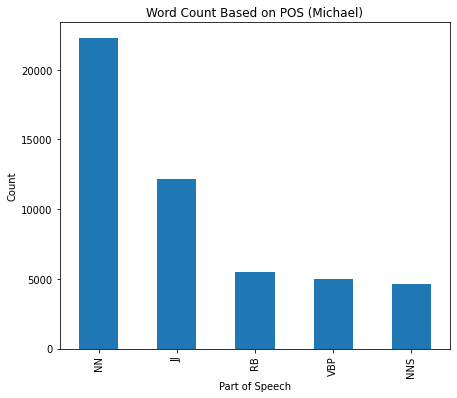

In [15]:
# Michael

df_michael = pd.DataFrame(michael_tags, columns=['word','POS'])
df_michael['POS'].value_counts().nlargest(5).plot(kind='bar', figsize=(7, 6))
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.title('Word Count Based on POS (Michael)')
plt.show()

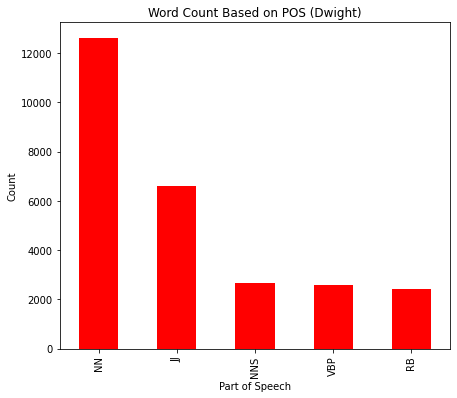

In [16]:
# Dwight
df_dwight = pd.DataFrame(dwight_tags, columns=['word','POS'])
df_dwight['POS'].value_counts().nlargest(5).plot(kind='bar', figsize=(7, 6), color = 'red')
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.title('Word Count Based on POS (Dwight)')
plt.show()

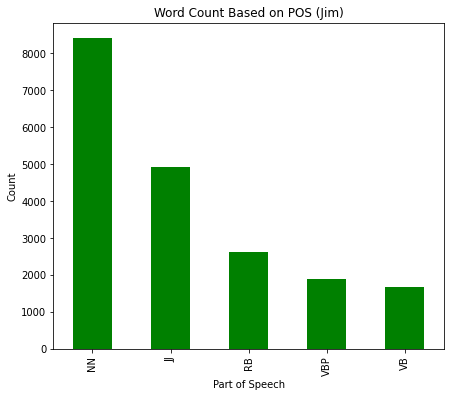

In [17]:
# Jim
df_jim = pd.DataFrame(jim_tags, columns=['word','POS'])
df_jim['POS'].value_counts().nlargest(5).plot(kind='bar', figsize=(7, 6), color = 'green')
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.title('Word Count Based on POS (Jim)')
plt.show()

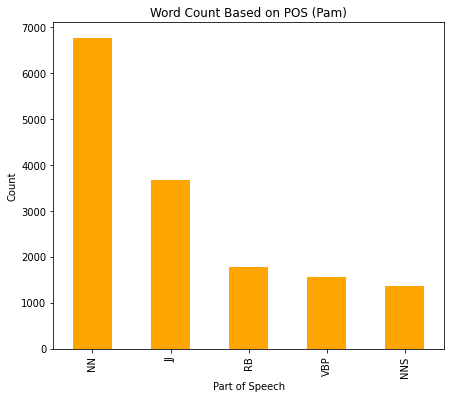

In [18]:
# Pam
df_pam  = pd.DataFrame(pam_tags, columns=['word','POS'])
df_pam['POS'].value_counts().nlargest(5).plot(kind='bar', figsize=(7, 6), color = 'orange')
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.title('Word Count Based on POS (Pam)')
plt.show()

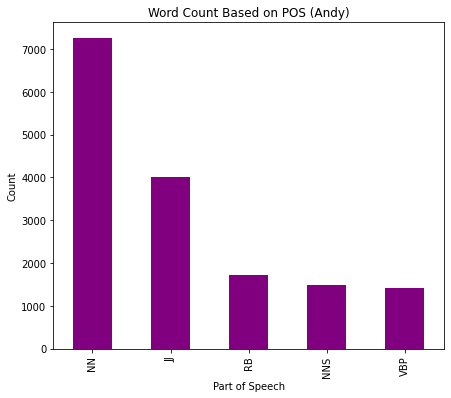

In [19]:
# Andy
df_andy = pd.DataFrame(andy_tags, columns=['word','POS'])
df_andy['POS'].value_counts().nlargest(5).plot(kind='bar', figsize=(7, 6), color = 'purple')
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.title('Word Count Based on POS (Andy)')
plt.show()

*POS Tagging Observations:*

Among the five characters, there are only six different word types that appear in their top five parts-of-speech.
1) NN - singular noun 2) JJ - adjective 3) present tense verb (not 3rd person singular) 4) RB - adverb 5) plural noun 6) VB - verb.

For all characters, singular nouns were the most popular by a significant margin. These were followed by adjectives. The remaining three slots consisted of present tense verbs, adverbs, plural nouns, and other verbs in a variety of orders. 

# Sentiment Analysis

**Polarity and Subjectivity Scores (by episode)**

In [20]:
# Getting polarity and subjectivity/objectivity values

officeData['text'] = officeData['text'].astype(str)
officeData['polarity'] = officeData['text'].apply(lambda text: TextBlob(text).sentiment.polarity)
officeData['subjectivity'] = officeData['text'].apply(lambda text: TextBlob(text).sentiment.subjectivity)

In [21]:
# Creating new data frames

df_both = officeData[['season','episode','polarity','subjectivity','imdb_rating']].groupby(['season', 'episode','imdb_rating'], as_index=False).mean()
df_polarity = officeData[['season','episode','polarity','imdb_rating']].groupby(['season', 'episode','imdb_rating'], as_index=False)['polarity'].mean()
df_subjectivity = officeData[['season','episode','subjectivity','imdb_rating']].groupby(['season', 'episode','imdb_rating'], as_index=False)['subjectivity'].mean()
df_both.head(10)

,season,episode,imdb_rating,polarity,subjectivity
0,1,1,7.6,0.094132,0.251716
1,1,2,8.3,0.160619,0.281217
2,1,3,7.9,0.086715,0.287742
3,1,4,8.1,0.138648,0.329781
4,1,5,8.4,0.075022,0.240141
5,1,6,7.8,0.119094,0.271457
6,2,1,8.7,0.055787,0.220300
7,2,2,8.2,0.081169,0.242391
8,2,3,8.4,0.092035,0.255999
9,2,4,8.4,0.110603,0.249999


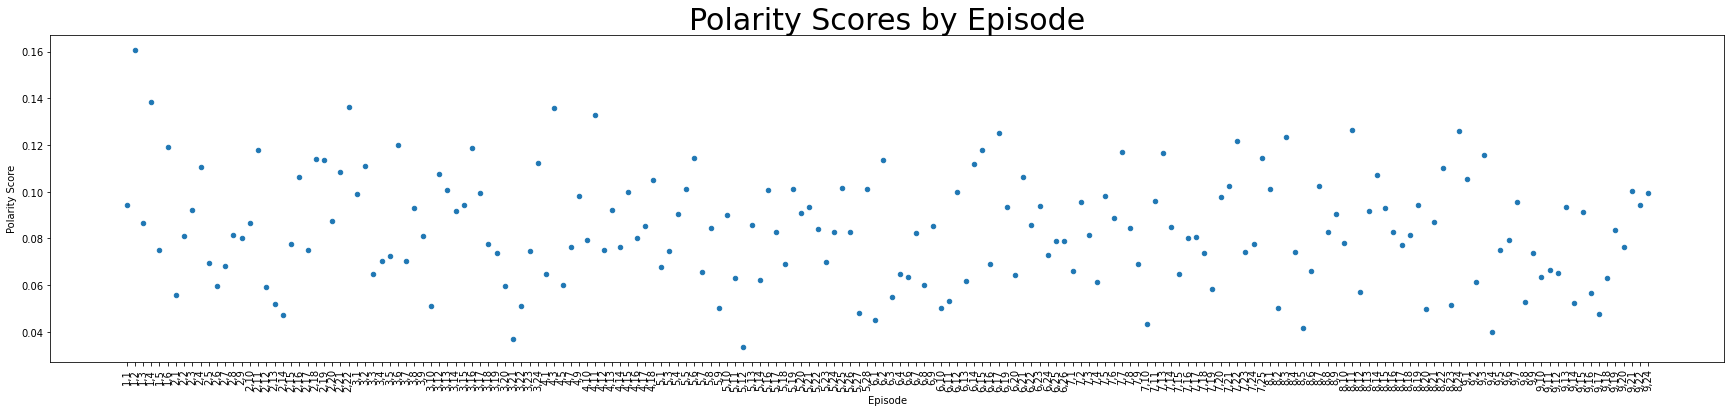

In [22]:
# Polarity Scores

df_both["count"] = df_both["season"].astype(str) +','+ df_both["episode"].astype(str)

df_both.plot.scatter(x='count', y='polarity', figsize=(30, 6))
plt.xlabel('Episode')
plt.ylabel('Polarity Score')
plt.title('Polarity Scores by Episode', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

*Polarity Observations*

Based on the scatterplot, there are no clear trends between the episode order and the average polarity scores. Polarity scores are recorded on a scale from [-1, 1] and our data has scores ranging from about 0.04 to 0.16. Therefore, it is reasonable to conclude that all episodes have a neutral-to-positive overall sentiment.

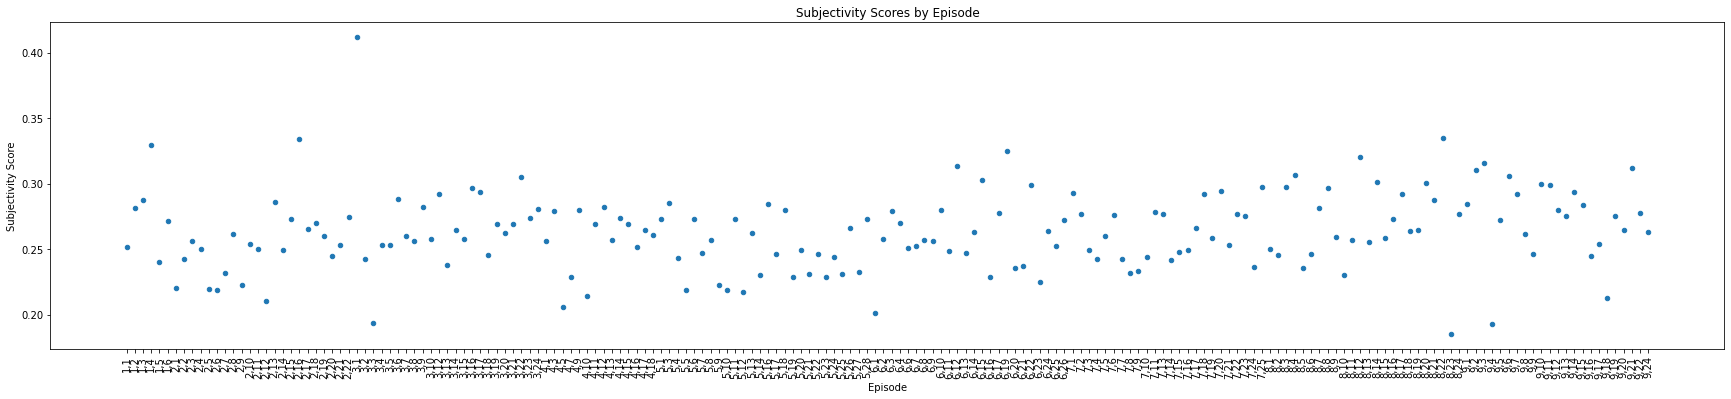

In [23]:
# Subjectivity Scores

df_both.plot.scatter(x='count', y='subjectivity', figsize=(30, 6))
plt.xlabel('Episode')
plt.ylabel('Subjectivity Score')
plt.title('Subjectivity Scores by Episode')
plt.xticks(rotation = 90)
plt.show()


*Subjectivity Observations:*

Subjectivity is scored on a scale from [0,1], where 0 is considered "very objective" and 1 is "very subjective." Similar to the the polarity scores, there does not appear to be a clear trend between episode order and subjectivity score. The scores range from just below 0.20 to just over 0.40, which means that none of the episodes would be considered "very subjective." The majority of episodes fall into the moderately objective to very objective range.

**Episode Polarity vs. Subjectivity**

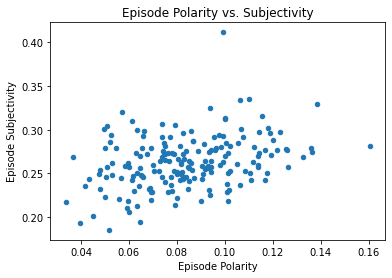


Pearson's Correlation Coefficient
              polarity  subjectivity
polarity      1.000000      0.338092
subjectivity  0.338092      1.000000


In [24]:
df_both.plot.scatter(x='polarity',
                      y='subjectivity')
plt.xlabel('Episode Polarity')
plt.ylabel('Episode Subjectivity')
plt.title('Episode Polarity vs. Subjectivity')
plt.show()

print()
print("Pearson's Correlation Coefficient")
print(df_both[['polarity','subjectivity']].corr(method='pearson'))

*Polarity vs. Subjectivity Observations:*

Based on the scatterplot above, there does appear to be a weak/moderate, positive, linear relationship between episode polarity and subjectivity. While this correlation is not very strong, an argument could be made that as polarity increases, subjectivity tends to increase as well. In other words, as the sentiment of an episode becomes more positive, the episode also becomes more subjective.

# IMDB Rating Analysis

**Episode Ratings by Director**

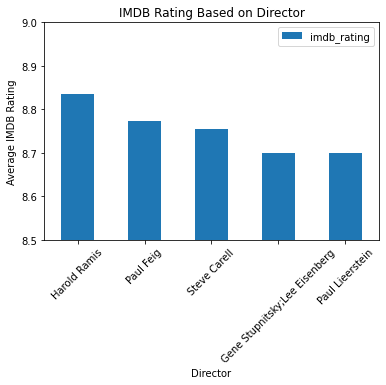


Top Directors Based on IMDB Rating


,director,imdb_rating
24,Harold Ramis,8.834539
46,Paul Feig,8.774183
57,Steve Carell,8.755148
21,Gene Stupnitsky;Lee Eisenberg,8.700000
48,Paul Lieerstein,8.700000


In [25]:
directors = officeData.groupby('director', as_index=False)['imdb_rating'].mean().sort_values(by=['imdb_rating'], ascending = False)
directors.head(5).plot.bar(x = 'director', y = 'imdb_rating', ylim=(8.5, 9))
plt.xlabel('Director')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation = 45)
plt.title("IMDB Rating Based on Director")
plt.show()

print()
print("Top Directors Based on IMDB Rating")
officeData.groupby('director', as_index=False)['imdb_rating'].mean().sort_values(by=['imdb_rating'], ascending = False).head(5)

*Top Directors Observations*
The top five directors in terms of IMDB rating are Ramis, Feig, Carell, Stupnitsky/Eisenberg, and Lieerstein. All of these directors boast average episode ragins of at least 8.7. 

**Transcript Length vs. IMDB Rating**

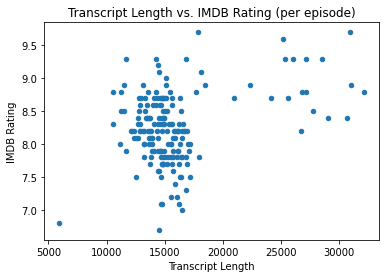


Pearson's Correlation Coefficient
             text_length  imdb_rating
text_length     1.000000     0.334011
imdb_rating     0.334011     1.000000


In [26]:
# Transcript Length vs. IMDB Rating (per Episode)
officeData['text_length']  = officeData['text'].str.len()
df_length = officeData[['season','episode','text_length','imdb_rating']].groupby(['season', 'episode','imdb_rating'], as_index=False)['text_length'].sum()
df_length.plot.scatter(x='text_length',
                      y='imdb_rating')
plt.xlabel('Transcript Length')
plt.ylabel('IMDB Rating')
plt.title('Transcript Length vs. IMDB Rating (per episode)')
plt.show()

print()
print("Pearson's Correlation Coefficient")
print(df_length[['text_length','imdb_rating']].corr(method='pearson'))


*Transcript Length vs. IMDB Rating Observations:*

Based on the scatterplot and Pearson's Correlation coefficient, there appears to be a weak/moderate, positive, linear relationship between transcript length and episode rating. This suggests that as the length of an episode's transcript increases, the IMDB rating will also increase.

**Episode Polarity vs IMDB Rating**

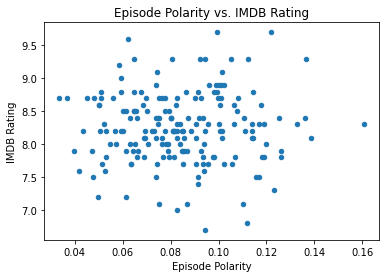


Pearson's Correlation Coefficient
             polarity  imdb_rating
polarity     1.000000     0.007487
imdb_rating  0.007487     1.000000


In [27]:
df_polarity.plot.scatter(x='polarity',
                      y='imdb_rating')
plt.xlabel('Episode Polarity')
plt.ylabel('IMDB Rating')
plt.title('Episode Polarity vs. IMDB Rating')
plt.show()

print()
print("Pearson's Correlation Coefficient")
print(df_polarity[['polarity','imdb_rating']].corr(method='pearson'))

*Episode Polarity vs. IMDB Rating Observations:*

Based on the scatterplot and Pearson's Correlation coefficient, there is no clear relationship between episode polarity and IMDB rating. The correlation coefficient is close to 0, and there is no visual trend in the scatterplot.

**Episode Subjectivity vs. IMDB Rating**

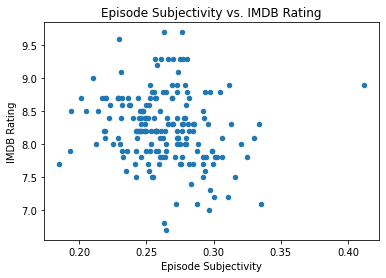


Pearson's Correlation Coefficient
              subjectivity  imdb_rating
subjectivity      1.000000    -0.171884
imdb_rating      -0.171884     1.000000


In [28]:
df_subjectivity.plot.scatter(x='subjectivity',
                      y='imdb_rating')
plt.xlabel('Episode Subjectivity')
plt.ylabel('IMDB Rating')
plt.title('Episode Subjectivity vs. IMDB Rating')
plt.show()

print()
print("Pearson's Correlation Coefficient")
print(df_subjectivity[['subjectivity','imdb_rating']].corr(method='pearson'))

*Episode Subjectivity vs. IMDB Rating Observations:*

Similar to the polarity scores, there is no clear relationship between episode subjectivity scores and IMDB rating. The only notable feature of this plot is the clear outlier that has a subjectivity score of over 0.4, over 0.05 higher than any other episode.

**K-Means Clustering Model:**

X = transcript length,
Y = IMDB rating

In [29]:
df_kmeans = df_length.drop(columns = ['season','episode'])

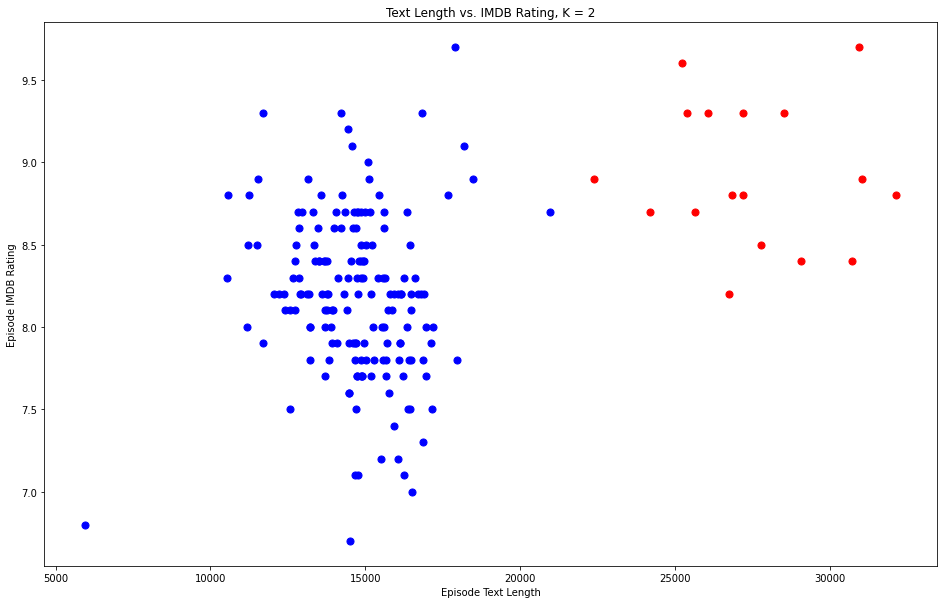

In [48]:
# 2 clusters

clt = KMeans(n_clusters=2)

clt.fit(df_kmeans)
cluster_labels = clt.predict(df_kmeans)

colors =  ['b', 'r', 'g', 'c', 'm', 'y', 'k']
plt.figure(figsize=(16, 10))

for i, row in df_length.iterrows():
    curr_label = cluster_labels[i]
    curr_color = colors[curr_label]
    plt.scatter(row['text_length'], row['imdb_rating'], c=curr_color, s=50)

plt.title('Text Length vs. IMDB Rating, K = 2')
plt.xlabel('Episode Text Length')
plt.ylabel('Episode IMDB Rating')
plt.show()

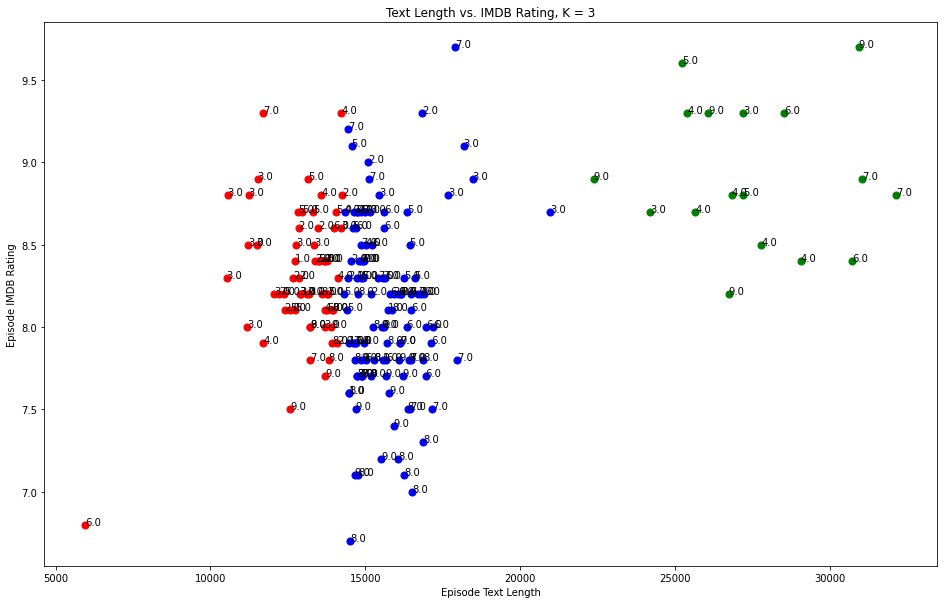

In [31]:
# 3 clusters

clt = KMeans(n_clusters=3)

clt.fit(df_kmeans)
cluster_labels = clt.predict(df_kmeans)

colors =  ['b', 'r', 'g', 'c', 'm', 'y', 'k']
plt.figure(figsize=(16, 10))

for i, row in df_length.iterrows():
    curr_label = cluster_labels[i]
    curr_color = colors[curr_label]
    plt.scatter(row['text_length'], row['imdb_rating'], c=curr_color, s=50)
    plt.text(row['text_length'], row['imdb_rating'], row['season'], size=10)

plt.title('Text Length vs. IMDB Rating, K = 3')
plt.xlabel('Episode Text Length')
plt.ylabel('Episode IMDB Rating')
plt.show()

*Clustering Model Observations:*

This clustering models groups data values (episodes) that have been plotted based on text length and IMDB rating. The first model, which has two clusters, seems to create two distinct groups based mainly on text length. The group towards the left of the scatterplot contains episodes with text lengths of a maximum of about 20,000 characters. These episodes have a wide range of IMDB ratings, with values from below 7.0 to almost a perfect 10.0. The second group is significantly smaller, and it contains episodes with text lengts of at least 22,000 characters. It is worth noting that this group has a noticeably higher average IMDB score. No episode in this group has a rating below 8.0. These clusters highlight the fact that episodes with longer text lengths are more likely to have a higher IMDB rating. 

The model with 3 clusters does not appear to create three distinct groups. All it really did was split the first group from the k=2 model in half.

**K-Means Clustering Model:**

X = transcript polarity,
Y = transcript subjectivity

In [32]:
df_kmeans2 = df_both.drop(columns = ['season','episode','imdb_rating','count'])
df_kmeans2.head(5)

,polarity,subjectivity
0,0.094132,0.251716
1,0.160619,0.281217
2,0.086715,0.287742
3,0.138648,0.329781
4,0.075022,0.240141


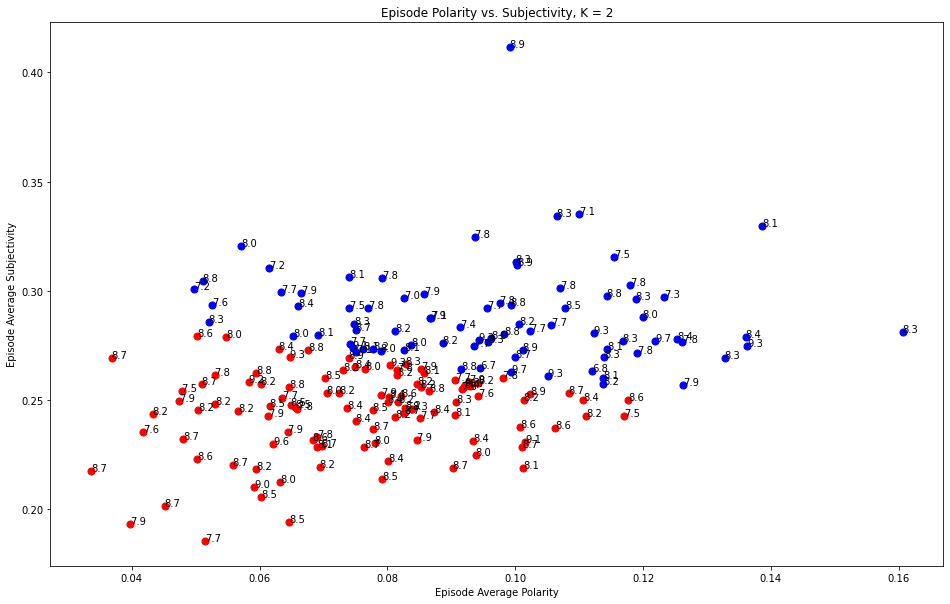

In [33]:
# KMeans model with 2 clusters

clt2 = KMeans(n_clusters=2)

clt2.fit(df_kmeans2)
cluster_labels = clt2.predict(df_kmeans2)

colors =  ['b', 'r', 'g', 'c', 'm', 'y', 'k']
plt.figure(figsize=(16, 10))

for i, row in df_both.iterrows():
    curr_label = cluster_labels[i]
    curr_color = colors[curr_label]
    plt.scatter(row['polarity'], row['subjectivity'], c=curr_color, s=50)
    plt.text(row['polarity'], row['subjectivity'], row['imdb_rating'], size=10)

plt.title('Episode Polarity vs. Subjectivity, K = 2')
plt.xlabel('Episode Average Polarity')
plt.ylabel('Episode Average Subjectivity')
plt.show()

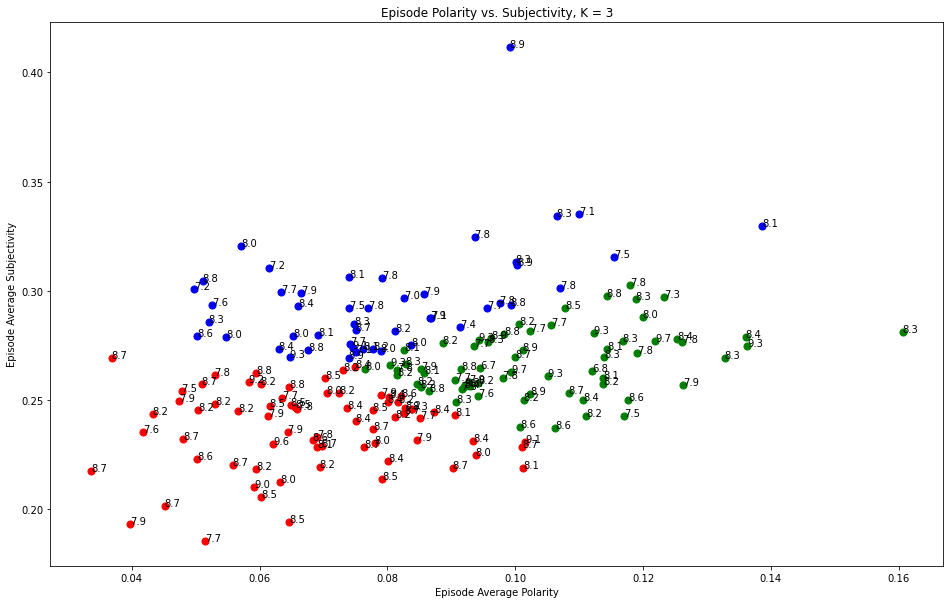

In [34]:
# KMeans model with 3 clusters

clt2 = KMeans(n_clusters=3)

clt2.fit(df_kmeans2)
cluster_labels = clt2.predict(df_kmeans2)

colors =  ['b', 'r', 'g', 'c', 'm', 'y', 'k']
plt.figure(figsize=(16, 10))

for i, row in df_both.iterrows():
    curr_label = cluster_labels[i]
    curr_color = colors[curr_label]
    plt.scatter(row['polarity'], row['subjectivity'], c=curr_color, s=50)
    plt.text(row['polarity'], row['subjectivity'], row['imdb_rating'], size=10)

plt.title('Episode Polarity vs. Subjectivity, K = 3')
plt.xlabel('Episode Average Polarity')
plt.ylabel('Episode Average Subjectivity')
plt.show()

*Cluster Model Observations:*

The cluster models for the data when it is plotted according to polarity and subjectivity do not identify any clear clusters. The model with 2 clusters appears to just split the data based on the average subjectivity scores of the episodes. The model with 3 clusters seems to also split by average polarity scores, but there are still no clear groupings or patterns that emerge. That being said, the correlation coefficient for the relationship between polarity and subjectivity was higher than any other correlation coefficient that I calculated, so I will explore these variables more with linear regression.

**PCA for Dimensionality Reduction**

Considering the lack of clear relationships between the majority of variables, I decided to perform dimensionality reduction to see which variables (if any) were valuable and which were redundant. 

In [35]:
d = {'text_length':'text_length', 'polarity':'avg_polarity','subjectivity':'avg_subjectivity'}
df = officeData[['season','episode','imdb_rating','text_length','polarity','subjectivity']].groupby(['season', 'episode','imdb_rating'], as_index=False).agg({'text_length':'sum', 'polarity':'mean','subjectivity':'mean'}).rename(columns=d)
df = df.drop(columns = ['season', 'episode'])
df.head(5)

,imdb_rating,text_length,avg_polarity,avg_subjectivity
0,7.6,14467,0.094132,0.251716
1,8.3,14727,0.160619,0.281217
2,7.9,14471,0.086715,0.287742
3,8.1,15743,0.138648,0.329781
4,8.4,12737,0.075022,0.240141


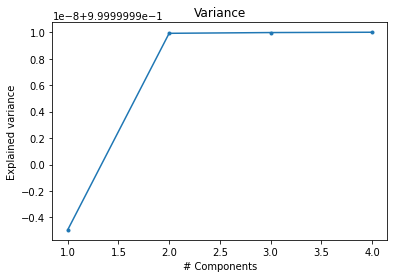

In [36]:
pca = PCA(n_components=4)
pca.fit(df)

cs = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.arange(1, 5), cs, '.-')
plt.title('Variance')
plt.xlabel('# Components')
plt.ylabel('Explained variance');


Based on this graphic, the data for The Office is pretty two-dimensional. It seems that the first two components (imdb_rating and text_length) explain all of the variance in the data. Unfortunately, this means that the remaining quantitative components (polarity and subjectivity) are redundant and do not contribute much regarding the variability of the data.

**Regression Model**

x = text length,
y = IMDB rating


In [37]:
# split data
Xtrain, Xtest, ytrain, ytest = train_test_split(df['text_length'], df['imdb_rating'], test_size=0.2, random_state=0)
Xtrain = Xtrain.values.reshape((-1, 1))
Xtest = Xtest.values.reshape((-1, 1))
ytrain = ytrain.values.reshape((-1, 1))
ytest = ytest.values.reshape((-1, 1))

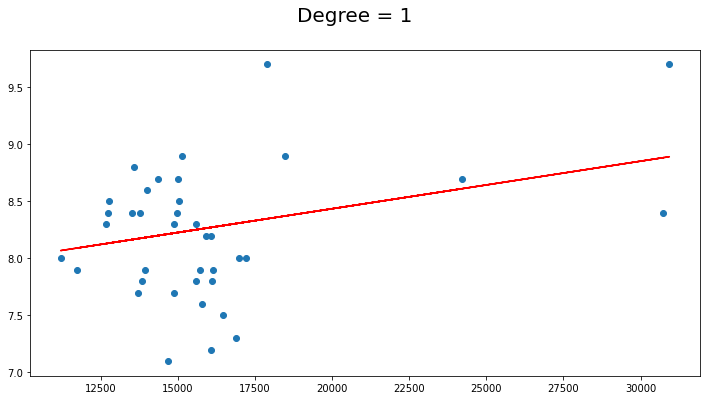

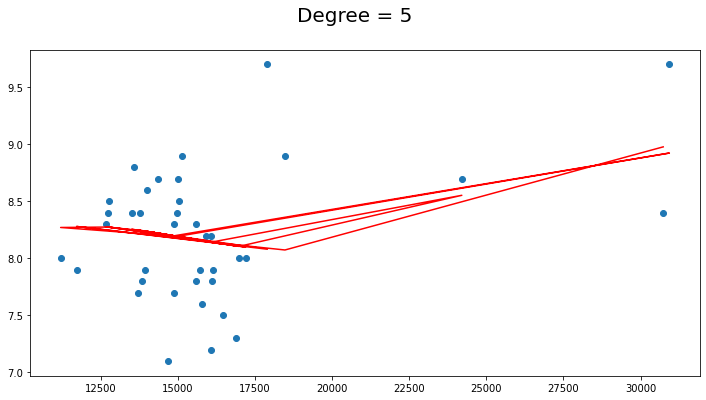

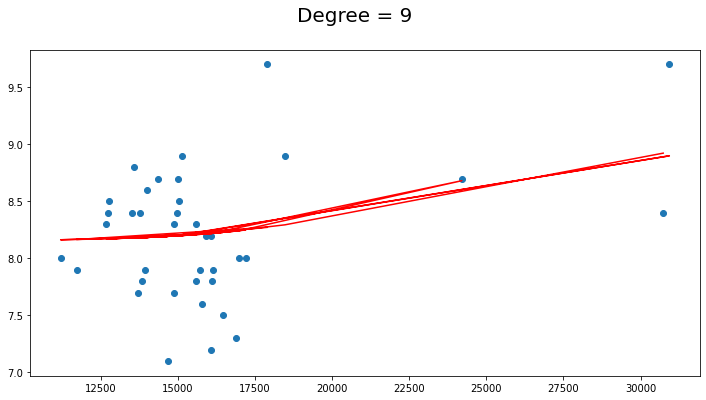

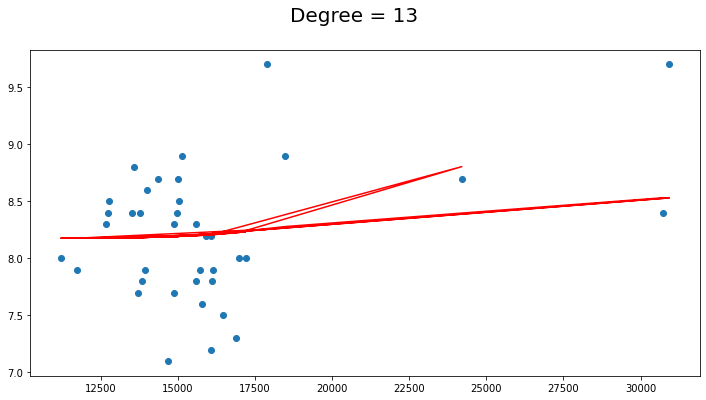

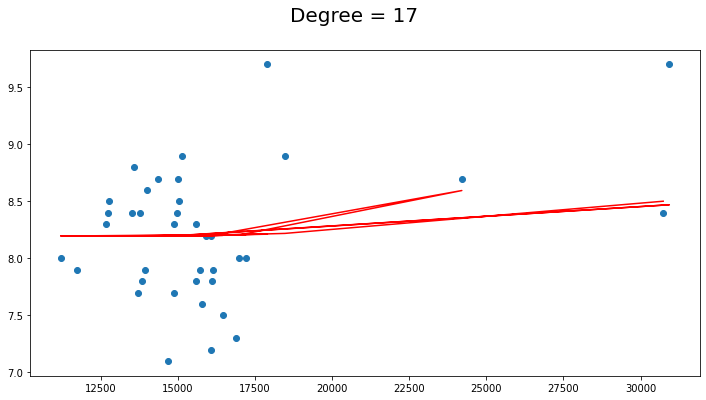

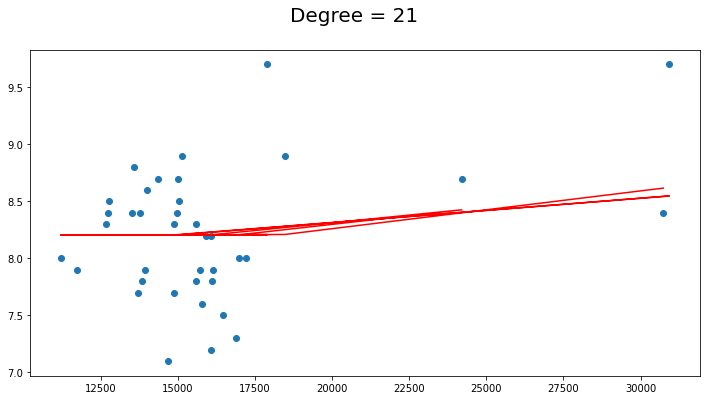

In [38]:
for i in range(1,22,4):
  poly_model = make_pipeline(PolynomialFeatures(i),
                           LinearRegression())
  poly_model.fit(Xtrain, ytrain)

  yfit = poly_model.predict(Xtest)

  plt.figure(figsize=(12,6))
  plt.suptitle("Degree = {}".format(i), fontsize = 20)
  plt.scatter(Xtest, ytest)
  plt.plot(Xtest, yfit, 'r')
  plt.show()

In [39]:
# Evaluate MAE Values
for i in range(1,21,1):
  poly_model = make_pipeline(PolynomialFeatures(i),
                            LinearRegression())

  poly_model.fit(Xtrain, ytrain)
  ypred = poly_model.predict(Xtest)

  mae = mean_absolute_error(ytest, ypred)
  mse = mean_squared_error(ytest, ypred)

  print('Degree = {} - MAE: {:.4f}, MSE: {:.4f}'.format(i,mae, mse))

Degree = 1 - MAE: 0.4410, MSE: 0.2910
Degree = 2 - MAE: 0.4348, MSE: 0.2835
Degree = 3 - MAE: 0.4348, MSE: 0.2837
Degree = 4 - MAE: 0.4181, MSE: 0.2820
Degree = 5 - MAE: 0.4215, MSE: 0.2873
Degree = 6 - MAE: 0.4263, MSE: 0.2821
Degree = 7 - MAE: 0.4280, MSE: 0.2831
Degree = 8 - MAE: 0.4298, MSE: 0.2835
Degree = 9 - MAE: 0.4315, MSE: 0.2839
Degree = 10 - MAE: 0.4337, MSE: 0.2852
Degree = 11 - MAE: 0.4341, MSE: 0.2881
Degree = 12 - MAE: 0.4328, MSE: 0.2918
Degree = 13 - MAE: 0.4308, MSE: 0.2952
Degree = 14 - MAE: 0.4288, MSE: 0.2978
Degree = 15 - MAE: 0.4271, MSE: 0.2995
Degree = 16 - MAE: 0.4284, MSE: 0.3006
Degree = 17 - MAE: 0.4299, MSE: 0.3011
Degree = 18 - MAE: 0.4315, MSE: 0.3012
Degree = 19 - MAE: 0.4330, MSE: 0.3011
Degree = 20 - MAE: 0.4344, MSE: 0.3007


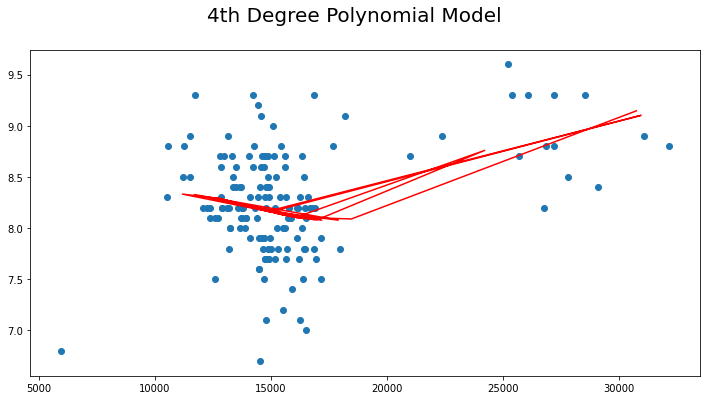

In [40]:
# 4th degree polynomial model

poly_model = make_pipeline(PolynomialFeatures(4),
                           LinearRegression())
poly_model.fit(Xtrain, ytrain)
yfit = poly_model.predict(Xtest)

plt.figure(figsize=(12,6))
plt.suptitle("4th Degree Polynomial Model", fontsize = 20)
plt.scatter(Xtrain, ytrain)
plt.plot(Xtest, yfit, 'r')
plt.show()

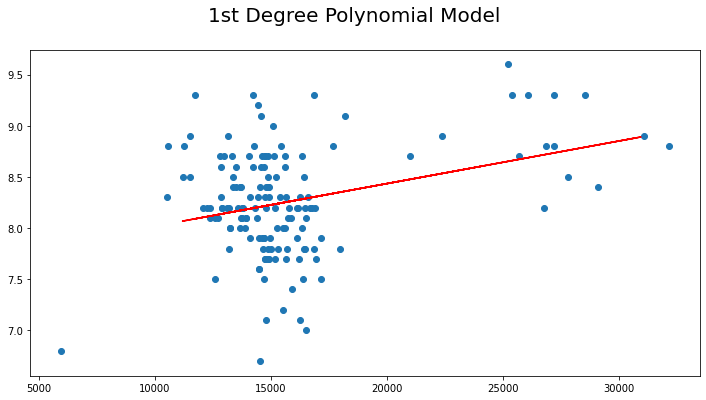

In [41]:
# 1st degree polynomial model

poly_model = make_pipeline(PolynomialFeatures(1),
                           LinearRegression())
poly_model.fit(Xtrain, ytrain)
yfit = poly_model.predict(Xtest)

plt.figure(figsize=(12,6))
plt.suptitle("1st Degree Polynomial Model", fontsize = 20)
plt.scatter(Xtrain, ytrain)
plt.plot(Xtest, yfit, 'r')
plt.show()

*Regresssion Model Observations:*

The Pearson's Correlation coeffecient for the relationship between transcript length and IMDB rating was 0.3340. This was one of the highest values, so I also constructed a series of polynomial regression model to investigate these variables in more detail. As calculated above, the model with the smallest mean absolute error was the 4th degree model (MAE = 0.4181). However, the visualizations of most of these models show that they may not be useful (sharp edges, hard to read/interpret, etc). Therefore, I have also plotted the 1st degree model, which had a MAE of 0.4410. The visualization confirms what was observed with the correlation coefficient previously. There is a weak, positive, linear relationship between transcript length and IMDB rating.

**Regression Model**

x = polarity, 
y = subjectivity

In [42]:
# split data
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(df['avg_polarity'], df['avg_subjectivity'], test_size=0.2, random_state=0)
Xtrain2 = Xtrain2.values.reshape((-1, 1))
Xtest2 = Xtest2.values.reshape((-1, 1))
ytrain2 = ytrain2.values.reshape((-1, 1))
ytest2 = ytest2.values.reshape((-1, 1))

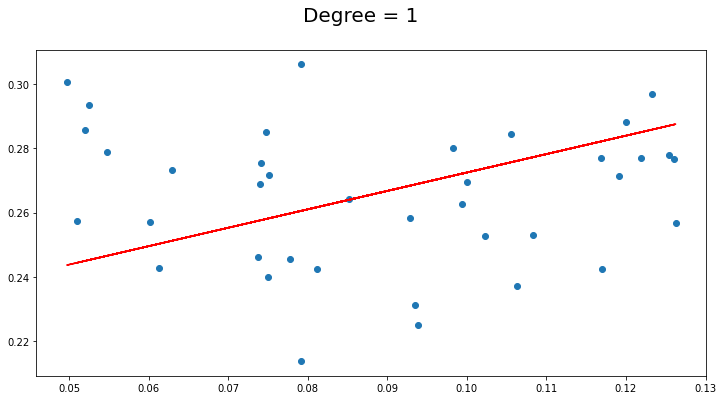

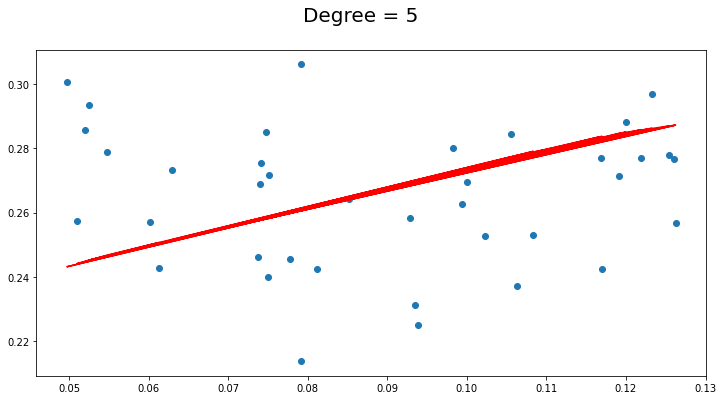

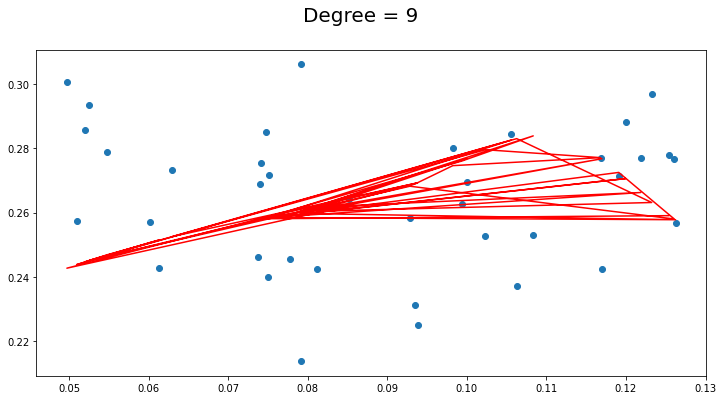

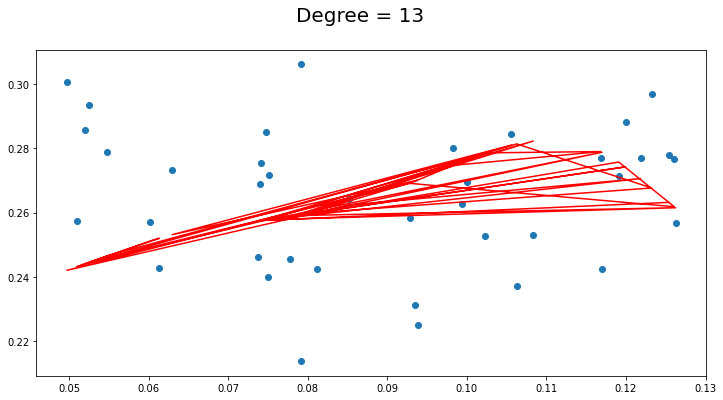

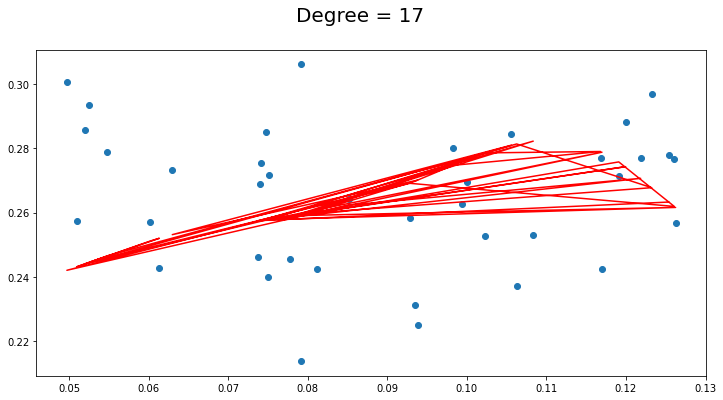

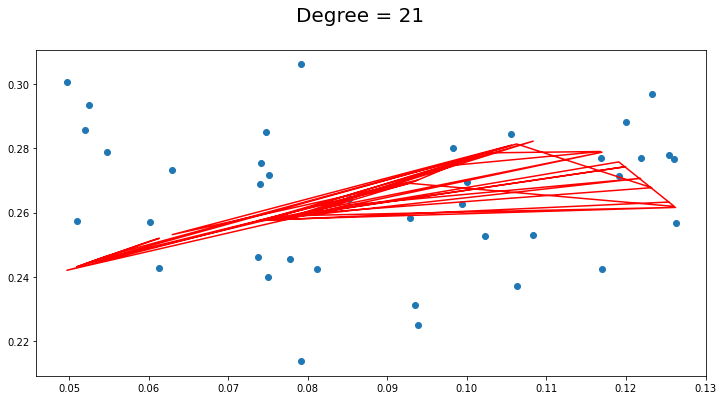

In [43]:
for i in range(1,22,4):
  poly_model2 = make_pipeline(PolynomialFeatures(i),
                           LinearRegression())
  poly_model2.fit(Xtrain2, ytrain2)

  yfit2 = poly_model2.predict(Xtest2)

  plt.figure(figsize=(12,6))
  plt.suptitle("Degree = {}".format(i), fontsize = 20)
  plt.scatter(Xtest2, ytest2)
  plt.plot(Xtest2, yfit2, 'r')
  plt.show()

In [44]:
# Evaluate MAE Values
for i in range(1,21,1):
  poly_model2 = make_pipeline(PolynomialFeatures(i),
                            LinearRegression())

  poly_model2.fit(Xtrain2, ytrain2)
  ypred2 = poly_model2.predict(Xtest2)

  mae = mean_absolute_error(ytest2, ypred2)
  mse = mean_squared_error(ytest2, ypred2)

  print('Degree = {} - MAE: {:.4f}, MSE: {:.4f}'.format(i,mae, mse))

Degree = 1 - MAE: 0.0208, MSE: 0.0007
Degree = 2 - MAE: 0.0209, MSE: 0.0007
Degree = 3 - MAE: 0.0211, MSE: 0.0007
Degree = 4 - MAE: 0.0211, MSE: 0.0007
Degree = 5 - MAE: 0.0210, MSE: 0.0007
Degree = 6 - MAE: 0.0210, MSE: 0.0007
Degree = 7 - MAE: 0.0202, MSE: 0.0007
Degree = 8 - MAE: 0.0213, MSE: 0.0007
Degree = 9 - MAE: 0.0214, MSE: 0.0007
Degree = 10 - MAE: 0.0213, MSE: 0.0007
Degree = 11 - MAE: 0.0212, MSE: 0.0007
Degree = 12 - MAE: 0.0212, MSE: 0.0007
Degree = 13 - MAE: 0.0211, MSE: 0.0007
Degree = 14 - MAE: 0.0211, MSE: 0.0007
Degree = 15 - MAE: 0.0211, MSE: 0.0007
Degree = 16 - MAE: 0.0211, MSE: 0.0007
Degree = 17 - MAE: 0.0211, MSE: 0.0007
Degree = 18 - MAE: 0.0211, MSE: 0.0007
Degree = 19 - MAE: 0.0211, MSE: 0.0007
Degree = 20 - MAE: 0.0211, MSE: 0.0007


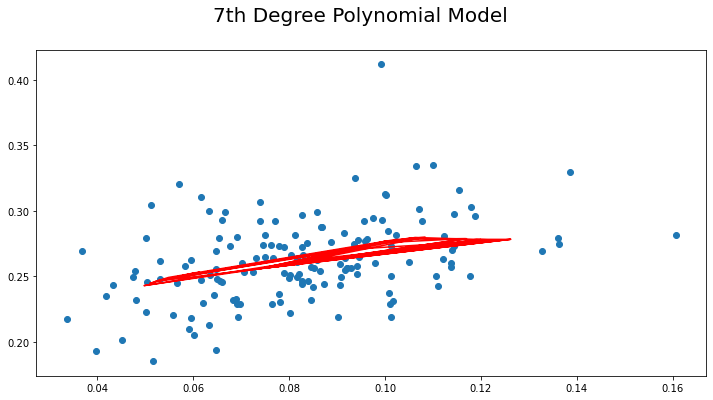

In [45]:
# 1st degree polynomial model

poly_model2 = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())
poly_model2.fit(Xtrain2, ytrain2)
yfit2 = poly_model2.predict(Xtest2)

plt.figure(figsize=(12,6))
plt.suptitle("7th Degree Polynomial Model", fontsize = 20)
plt.scatter(Xtrain2, ytrain2)
plt.plot(Xtest2, yfit2, 'r')
plt.show()

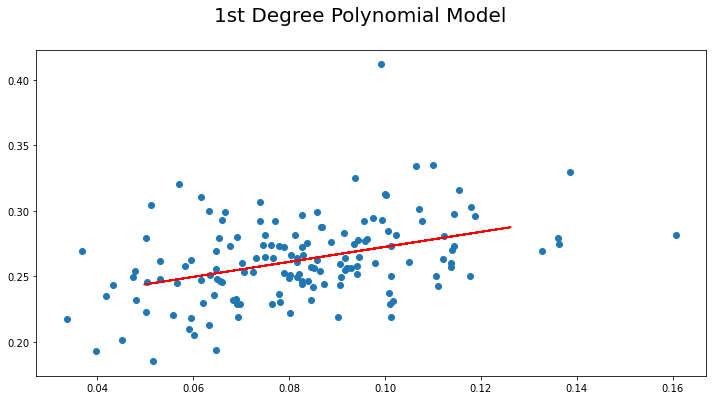

In [46]:
# 1st degree polynomial model

poly_model2 = make_pipeline(PolynomialFeatures(1),
                           LinearRegression())
poly_model2.fit(Xtrain2, ytrain2)
yfit2 = poly_model2.predict(Xtest2)

plt.figure(figsize=(12,6))
plt.suptitle("1st Degree Polynomial Model", fontsize = 20)
plt.scatter(Xtrain2, ytrain2)
plt.plot(Xtest2, yfit2, 'r')
plt.show()

*Regresssion Model Observations:*

The Pearson's Correlation coeffecient for the relationship between episode polarity and episode subjectivity was 0.3381, the largest of all values from the analysis. The polynomial model with the smallest mean absolute error was the 7th degree model (MAE = 0.0202). However, this MAE is not significantly less than any other MAE. Again, the higher-degree polynomial models are hard to visualize, so I have also plotted the 1st degree model (MAE = 0.0208). The visualization confirms what was observed with the correlation coefficient previously. There is a weak, positive, linear relationship between transcript length and IMDB rating.

# Summary of Findings

For each of the three topics of investigation, here are the main findings...

1. Transcript Analysis
*   The top characters (or character) dominates the show. For example, Michael had over 4,000 more lines (10,921) as Dwight (6,847), who had the second most 
*   There is a substantial amount of dialogue between main characters. Andy is the only top-5 character who did not have another character's name in their top 20 words. For Pam, "michael" had a TF-IDF score of 0.26. For Dwight, "jim" had a score of 0.25.
*   Singular nouns and adjectives dominate the transcripts. They were the top two parts-of-speech for all five characters.

2. Sentiment Analysis
*   Neither polarity scores nor subjectivity scores seemed to be correlated with the order of episode. Polarity scores ranged from 0.04 to 0.16 ("slightly positive") while subjectivity scores ranged from about 0.2 to 0.4 ("moderately-to-very objective")
*   Polarity and subjectivity scores had a correlation of 0.33 (weak, positive, linear)

3. IMDB Rating Analysis
*   Weak/moderate positive relationship between transcript length and episode rating
*   Cluster analysis (k=2) revealed that episodes with transcripts longer than 20,000 characters were much more likely to have a higher rating. Shorter transcripts could also achieve high ratings, but the majority of lower-rated episodes were relatively short.
*   No other quantitative attribute seemed to impact IMDB ratings. PCA for dimensionality reduction revealed that IMDB rating and text length accounted for almost all variability in the data.
*  Polynomial models were often difficult to interpret.















# Conclusion

Overall, I believe that this was a thorough analysis that examined all of the available attributes. I obtained some interesting information regarding the transcript compositions and the sentiment analyses based on episode. However,t proved much more difficult to uncover many attributes that had a clear relationship with IMDB rating, which was the ultimate goal. The most valuable takeaway is that episodes from *The Office* with longer transcripts had a significantly higher chance of obtaining a high IMDB rating. This idea was sparked by the correlation coefficients and became clear during the K-means clustering analysis.

Despite my disappointment that there were not more clear relationships between various sentiment measurements and IMDB ratings, I am pleased with the investigation overall. Everything seemed to "work" properly. Unfortunately, the results just were not as eye-opening as I had hoped. That being said, this project incorporated a variety of techniques that we learned throughout the semester, ranging from simple preprocessing steps to more intricate polynomial regression and K-means clustering models. This investigation could be improved in a variety of ways. I grouped the transcripts by episode. Instead, they could be grouped by character. Additionally, it would be interesting to see what words would be the most popular if more stop words were removed. This may have a slight impact on the TF-IDF scores or the Part-of-Speech tagging. These extensions would augment an already sound analysis. All things considered, I believe that I met the high-target goals that I set at the beginning.